In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/dataset15min/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

3492290

In [6]:
with open('dataset/generado/dataset15min/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

3492290

In [8]:
with open('dataset/generado/dataset15min/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

436537

In [10]:
with open('dataset/generado/dataset15min/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

436537

In [12]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

436590

In [14]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

436590

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_completo/vanilla_dropout.h5')

Epoch 1/50
109135/109135 [==============================] - 2344s 21ms/step - loss: 0.0015 - mae: 0.0257 - mse: 0.0015 - val_loss: 0.0021 - val_mae: 0.0364 - val_mse: 0.0021
Epoch 2/50
109135/109135 [==============================] - 1286s 12ms/step - loss: 0.0014 - mae: 0.0240 - mse: 0.0014 - val_loss: 0.0024 - val_mae: 0.0388 - val_mse: 0.0024
Epoch 3/50
109135/109135 [==============================] - 1263s 12ms/step - loss: 0.0013 - mae: 0.0239 - mse: 0.0013 - val_loss: 0.0024 - val_mae: 0.0382 - val_mse: 0.0024
Epoch 4/50
109135/109135 [==============================] - 1239s 11ms/step - loss: 6.0984 - mae: 0.0273 - mse: 6.0984 - val_loss: 0.0024 - val_mae: 0.0398 - val_mse: 0.0024


13644/13644 [==============================] - 58s 4ms/step - loss: 0.0025 - mae: 0.0401 - mse: 0.0025
test loss, test acc: [0.0024632196873426437, 0.040097229182720184, 0.0024632196873426437]


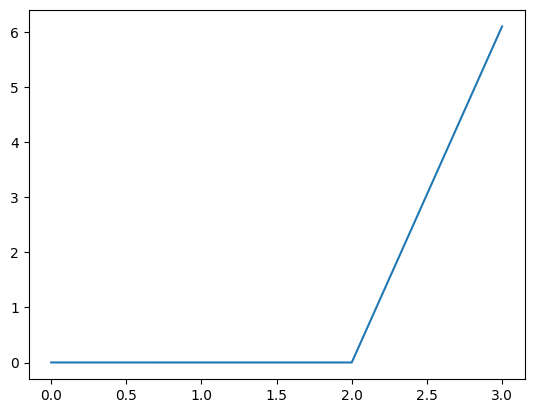

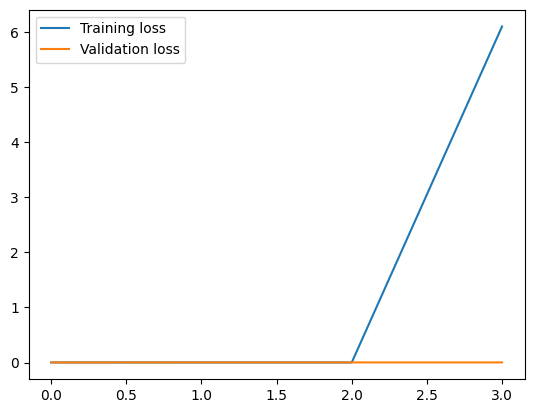

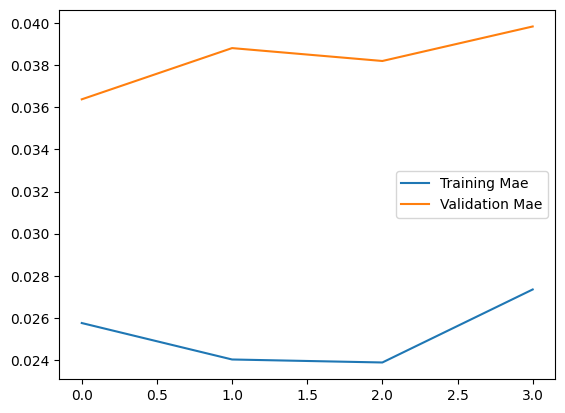

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 57s 4ms/step


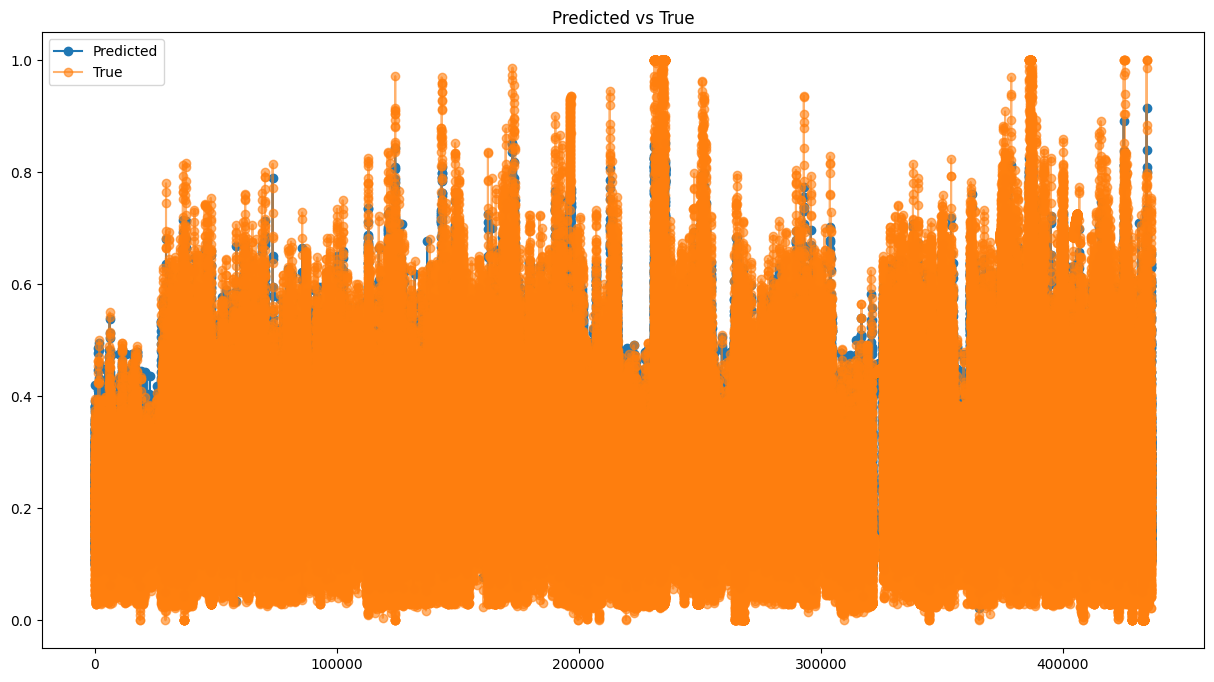

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04009714438828185,
 'mse': 0.04963082624907956,
 'rmse': 0.0024632189141663248}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_completo/vanilla_NO_dropout.h5')

Epoch 1/50
109135/109135 [==============================] - 1184s 11ms/step - loss: 9.8316e-04 - mae: 0.0187 - mse: 9.8316e-04 - val_loss: 0.0014 - val_mae: 0.0271 - val_mse: 0.0014
Epoch 2/50
109135/109135 [==============================] - 1196s 11ms/step - loss: 9.0571e-04 - mae: 0.0177 - mse: 9.0571e-04 - val_loss: 0.0015 - val_mae: 0.0286 - val_mse: 0.0015
Epoch 3/50
109135/109135 [==============================] - 1193s 11ms/step - loss: 8.9418e-04 - mae: 0.0176 - mse: 8.9418e-04 - val_loss: 0.0015 - val_mae: 0.0277 - val_mse: 0.0015
Epoch 4/50
109135/109135 [==============================] - 1201s 11ms/step - loss: 8.8787e-04 - mae: 0.0175 - mse: 8.8787e-04 - val_loss: 0.0014 - val_mae: 0.0270 - val_mse: 0.0014


13644/13644 [==============================] - 57s 4ms/step - loss: 0.0015 - mae: 0.0278 - mse: 0.0015
test loss, test acc: [0.0015001421561464667, 0.02775729075074196, 0.0015001421561464667]


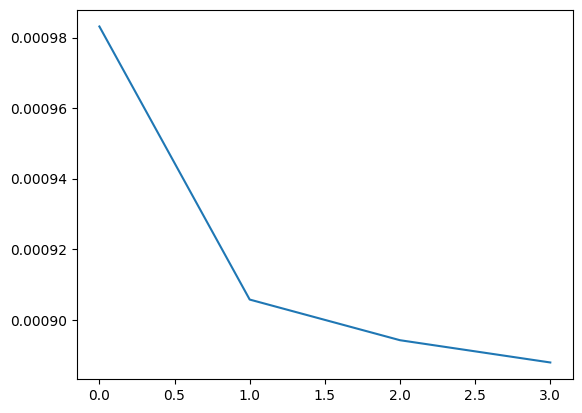

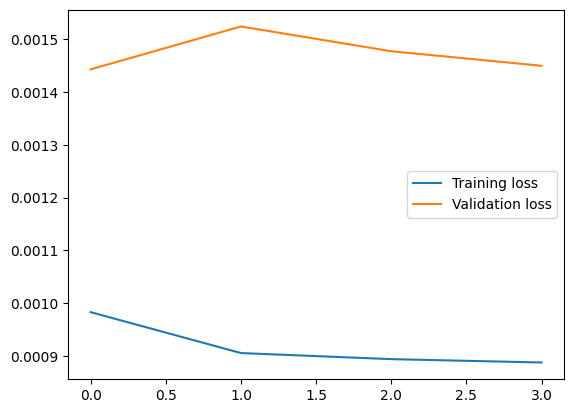

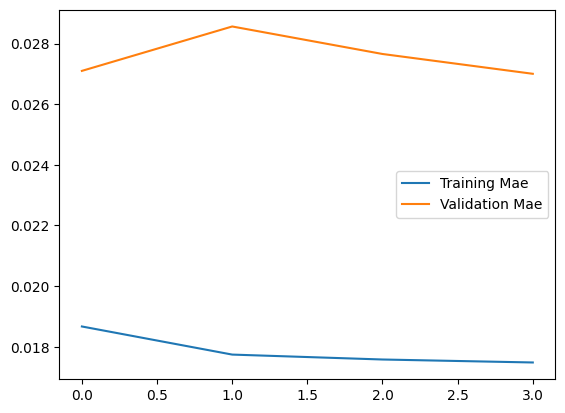

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 54s 4ms/step


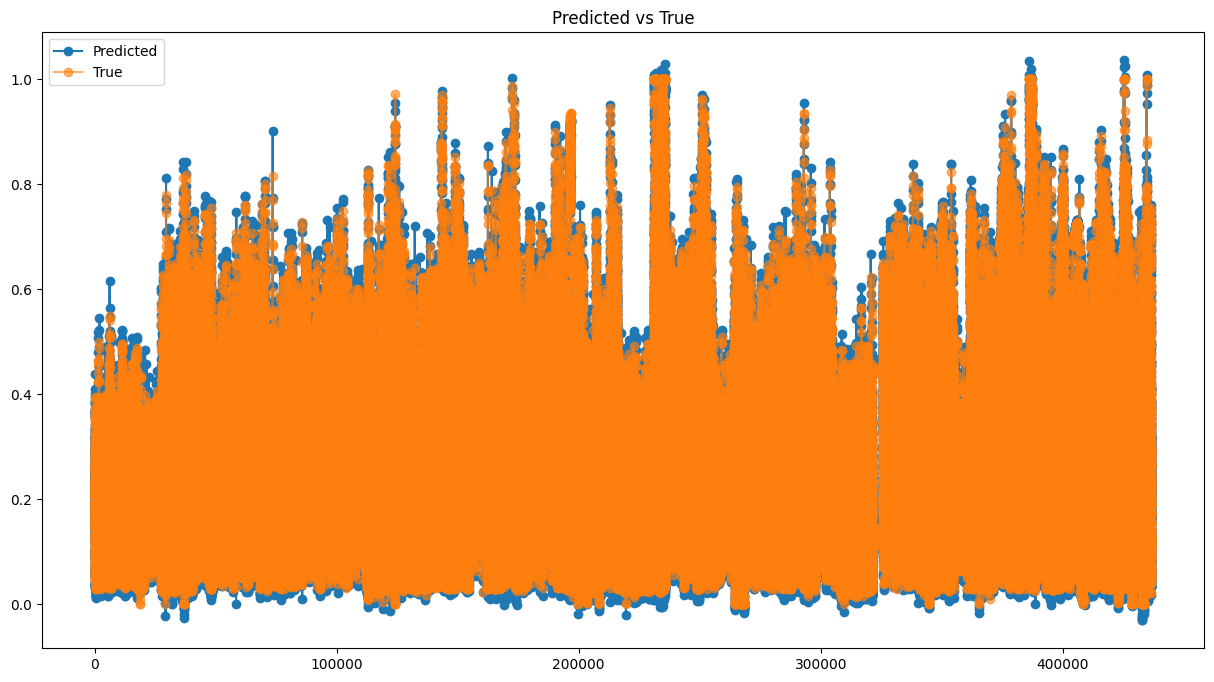

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.02775726944604968,
 'mse': 0.038731707095516474,
 'rmse': 0.001500145134532881}

# Entrenamiento Stacked LSTM con dropout

In [26]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [27]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_completo/stacked_dropout.h5')

Epoch 1/50
109135/109135 [==============================] - 2334s 21ms/step - loss: 0.0015 - mae: 0.0258 - mse: 0.0015 - val_loss: 0.0023 - val_mae: 0.0369 - val_mse: 0.0023
Epoch 2/50
109135/109135 [==============================] - 2343s 21ms/step - loss: 0.0014 - mae: 0.0242 - mse: 0.0014 - val_loss: 0.0019 - val_mae: 0.0336 - val_mse: 0.0019
Epoch 3/50
109135/109135 [==============================] - 2351s 22ms/step - loss: 0.0013 - mae: 0.0240 - mse: 0.0013 - val_loss: 0.0021 - val_mae: 0.0372 - val_mse: 0.0021
Epoch 4/50
109135/109135 [==============================] - 2352s 22ms/step - loss: 0.0013 - mae: 0.0238 - mse: 0.0013 - val_loss: 0.0024 - val_mae: 0.0393 - val_mse: 0.0024
Epoch 5/50
109135/109135 [==============================] - 2404s 22ms/step - loss: 0.0013 - mae: 0.0237 - mse: 0.0013 - val_loss: 0.0026 - val_mae: 0.0421 - val_mse: 0.0026


13644/13644 [==============================] - 102s 8ms/step - loss: 0.0026 - mae: 0.0429 - mse: 0.0026
test loss, test acc: [0.00263490853831172, 0.04285360872745514, 0.00263490853831172]


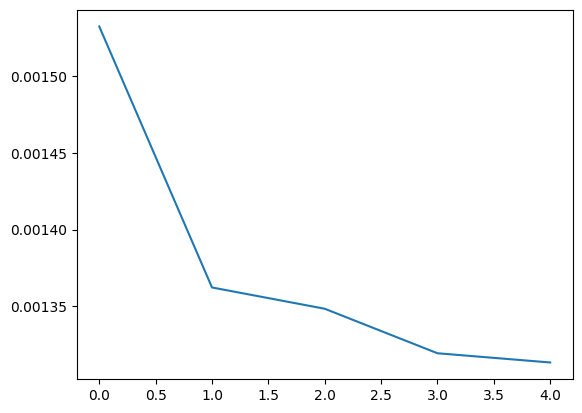

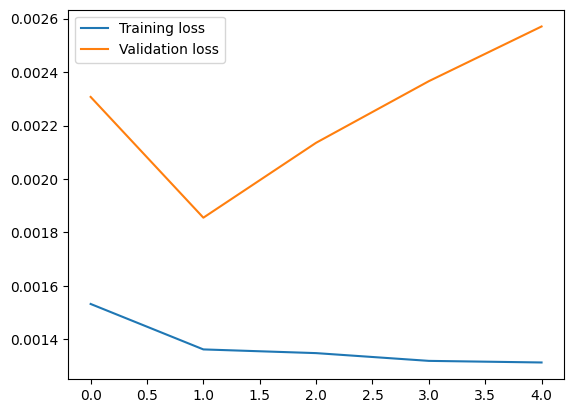

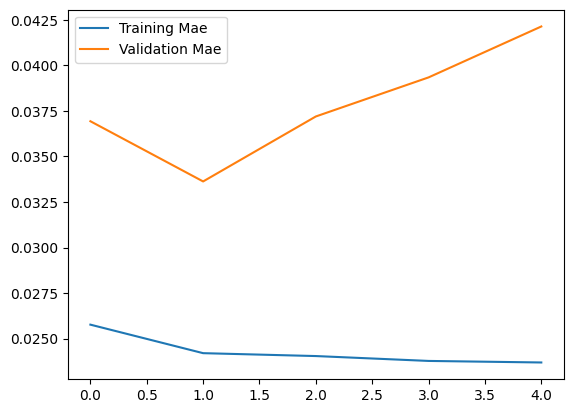

In [28]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 96s 7ms/step


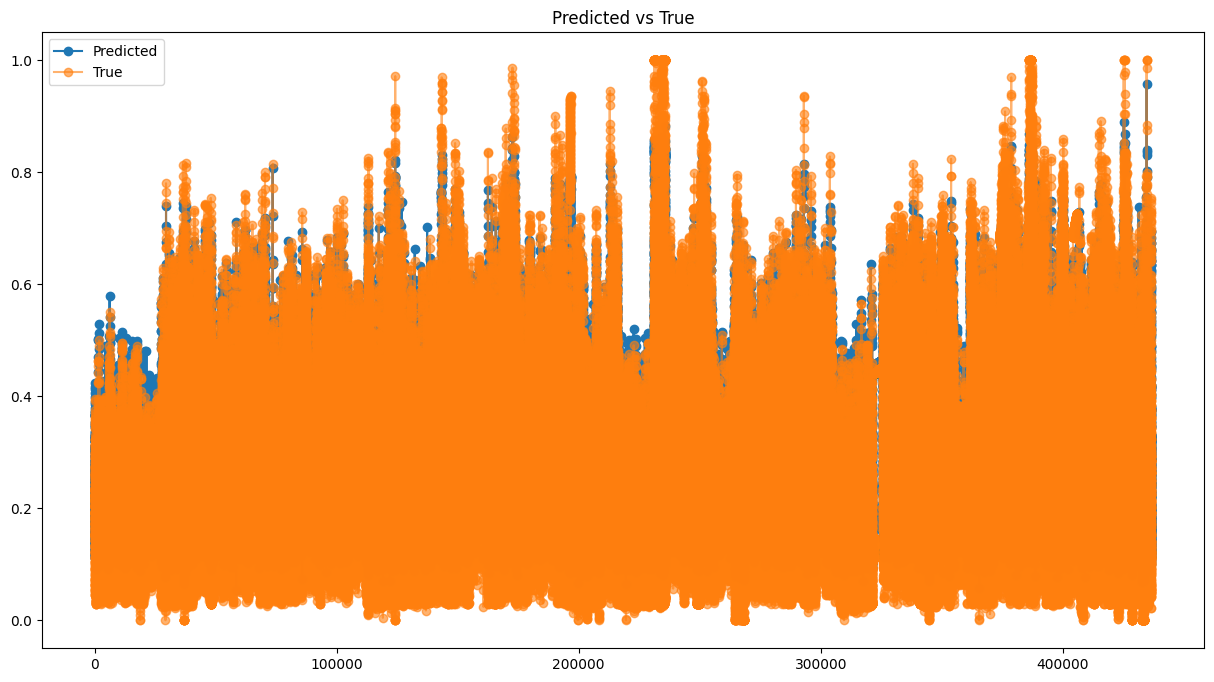

In [29]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [30]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04285356531958601,
 'mse': 0.05133145308543418,
 'rmse': 0.0026349180758621304}

# Entrenamiento Stacked LSTM sin dropout

In [31]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_completo/stacked_NO_dropout.h5')

Epoch 1/50
109135/109135 [==============================] - 2347s 21ms/step - loss: 0.0010 - mae: 0.0189 - mse: 0.0010 - val_loss: 0.0015 - val_mae: 0.0277 - val_mse: 0.0015
Epoch 2/50
109135/109135 [==============================] - 2322s 21ms/step - loss: 9.0117e-04 - mae: 0.0177 - mse: 9.0117e-04 - val_loss: 0.0015 - val_mae: 0.0284 - val_mse: 0.0015
Epoch 3/50
109135/109135 [==============================] - 2629s 24ms/step - loss: 8.8913e-04 - mae: 0.0175 - mse: 8.8913e-04 - val_loss: 0.0015 - val_mae: 0.0283 - val_mse: 0.0015
Epoch 4/50
109135/109135 [==============================] - 2487s 23ms/step - loss: 8.8190e-04 - mae: 0.0174 - mse: 8.8190e-04 - val_loss: 0.0015 - val_mae: 0.0283 - val_mse: 0.0015


13644/13644 [==============================] - 110s 8ms/step - loss: 0.0016 - mae: 0.0290 - mse: 0.0016
test loss, test acc: [0.0015572183765470982, 0.029033780097961426, 0.0015572183765470982]


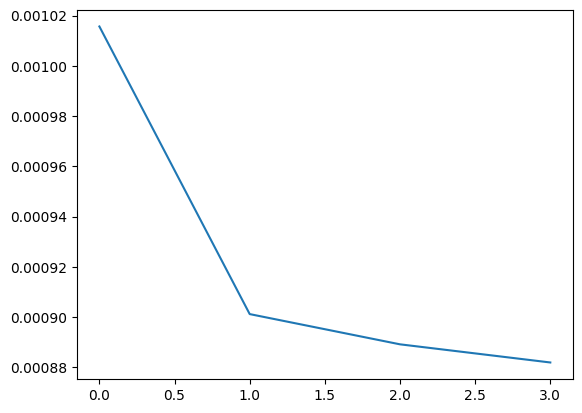

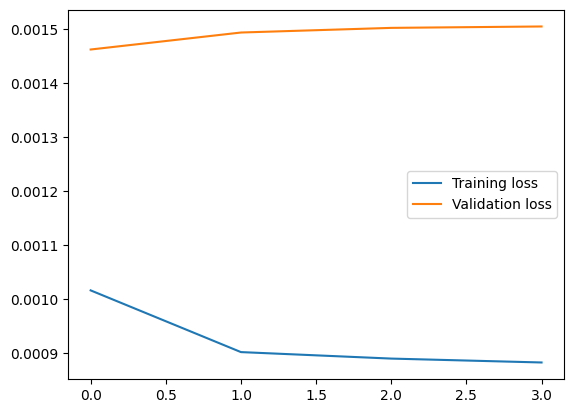

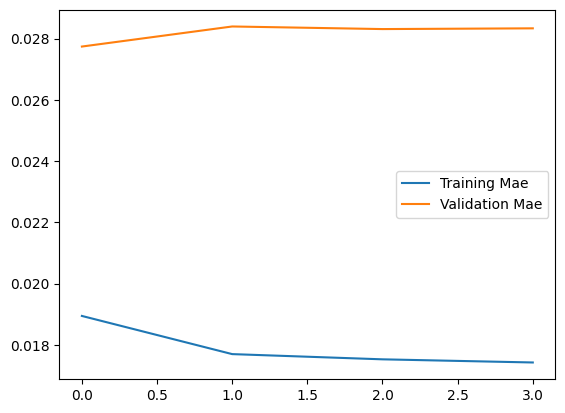

In [33]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 290s 21ms/step


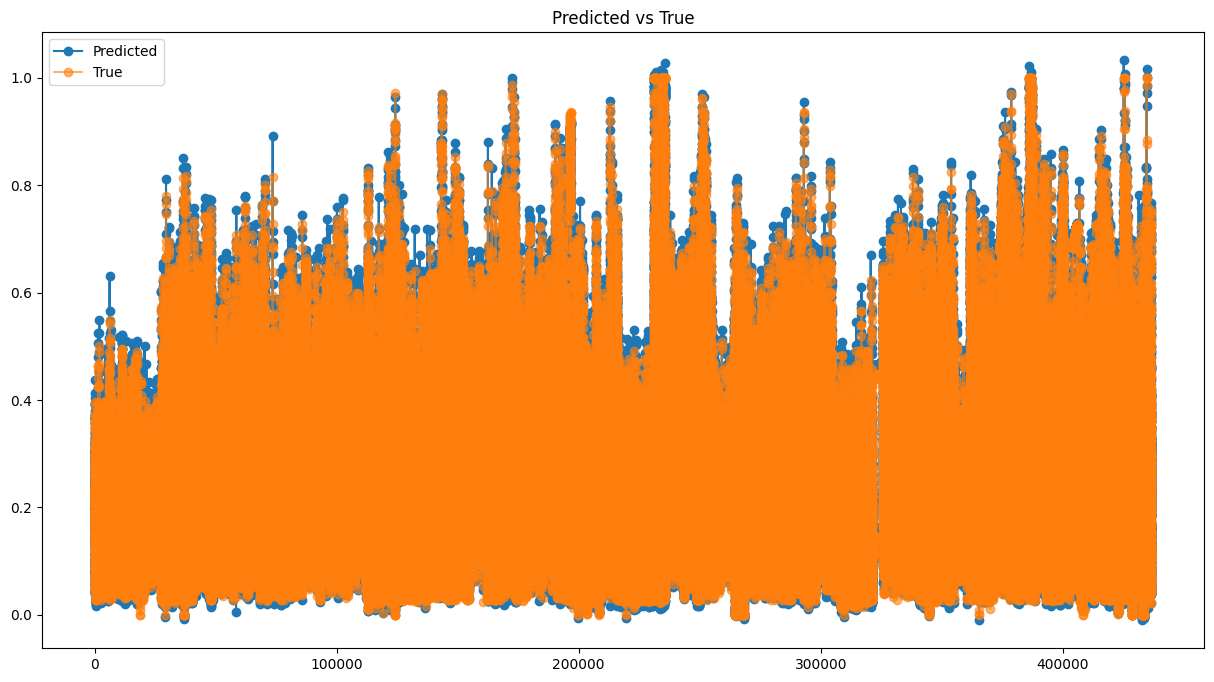

In [34]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [35]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.029033829118189133,
 'mse': 0.039461656421031534,
 'rmse': 0.0015572223274915391}

# Entrenamiento Bidirectional LSTM con dropout

In [36]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [37]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_completo/bidirectional_dropout.h5')

Epoch 1/50
109135/109135 [==============================] - 1927s 18ms/step - loss: 0.0016 - mae: 0.0260 - mse: 0.0016 - val_loss: 0.0018 - val_mae: 0.0310 - val_mse: 0.0018
Epoch 2/50
109135/109135 [==============================] - 1649s 15ms/step - loss: 0.0014 - mae: 0.0244 - mse: 0.0014 - val_loss: 0.0019 - val_mae: 0.0313 - val_mse: 0.0019
Epoch 3/50
109135/109135 [==============================] - 1579s 14ms/step - loss: 0.0014 - mae: 0.0241 - mse: 0.0014 - val_loss: 0.0017 - val_mae: 0.0305 - val_mse: 0.0017
Epoch 4/50
109135/109135 [==============================] - 2676s 25ms/step - loss: 0.0026 - mae: 0.0303 - mse: 0.0026 - val_loss: 0.0038 - val_mae: 0.0486 - val_mse: 0.0038


13644/13644 [==============================] - 84s 6ms/step - loss: 0.0037 - mae: 0.0485 - mse: 0.0037
test loss, test acc: [0.003710848046466708, 0.04849988594651222, 0.003710848046466708]


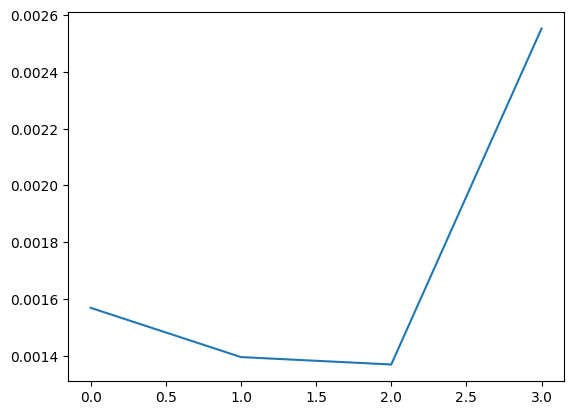

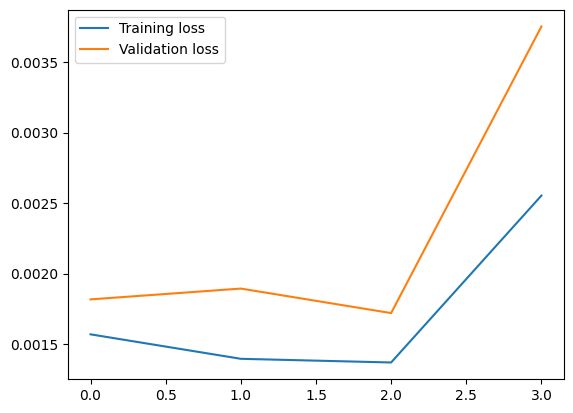

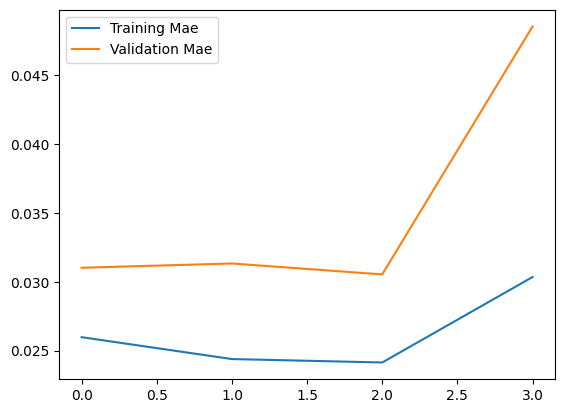

In [38]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 83s 6ms/step


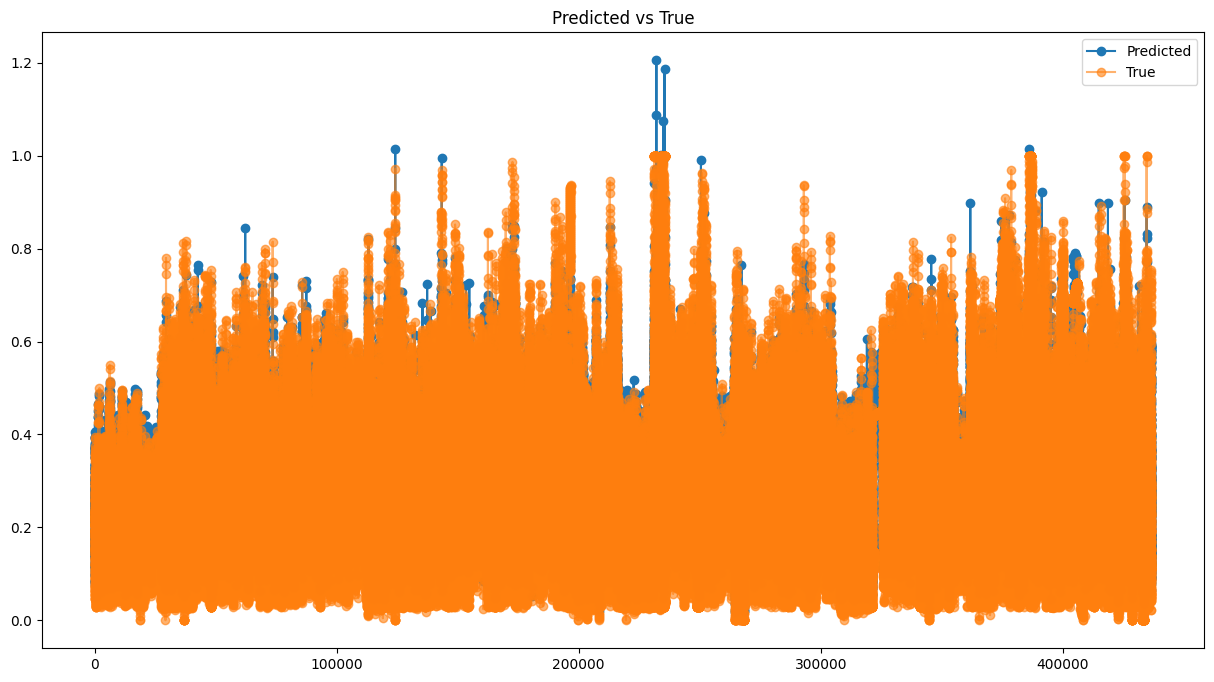

In [39]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [40]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04849989591402428,
 'mse': 0.06091671831946003,
 'rmse': 0.003710846570812437}

# Entrenamiento Bidirectional LSTM sin dropout

In [41]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_completo/bidirectional_NO_dropout.h5')

Epoch 1/50
109135/109135 [==============================] - 1825s 17ms/step - loss: 9.8918e-04 - mae: 0.0187 - mse: 9.8918e-04 - val_loss: 0.0014 - val_mae: 0.0264 - val_mse: 0.0014
Epoch 2/50
109135/109135 [==============================] - 2305s 21ms/step - loss: 9.0170e-04 - mae: 0.0177 - mse: 9.0170e-04 - val_loss: 0.0015 - val_mae: 0.0277 - val_mse: 0.0015
Epoch 3/50
109135/109135 [==============================] - 2106s 19ms/step - loss: 8.9264e-04 - mae: 0.0176 - mse: 8.9264e-04 - val_loss: 0.0015 - val_mae: 0.0278 - val_mse: 0.0015
Epoch 4/50
109135/109135 [==============================] - 1833s 17ms/step - loss: 8.8790e-04 - mae: 0.0175 - mse: 8.8790e-04 - val_loss: 0.0015 - val_mae: 0.0276 - val_mse: 0.0015


13644/13644 [==============================] - 90s 7ms/step - loss: 0.0015 - mae: 0.0283 - mse: 0.0015
test loss, test acc: [0.0015202501090243459, 0.028268108144402504, 0.0015202501090243459]


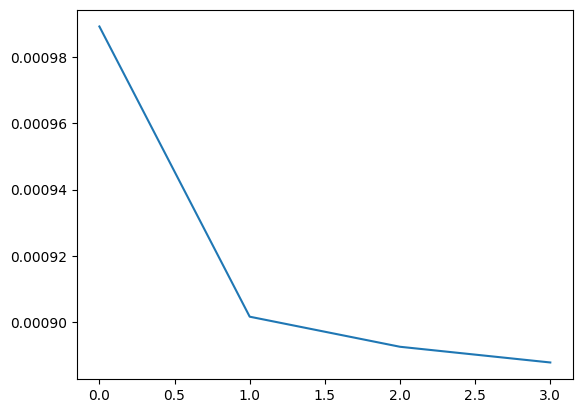

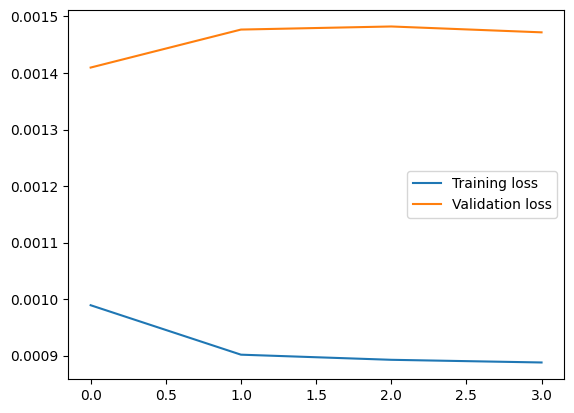

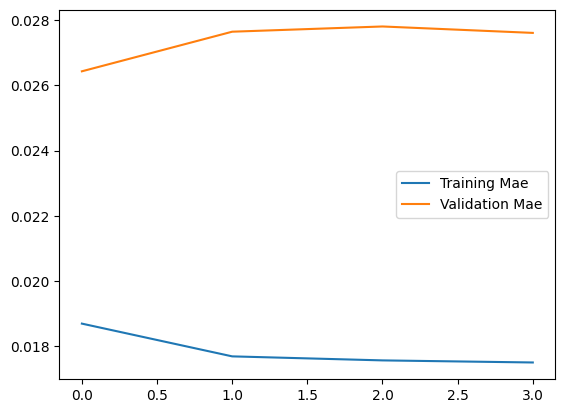

In [43]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 93s 7ms/step


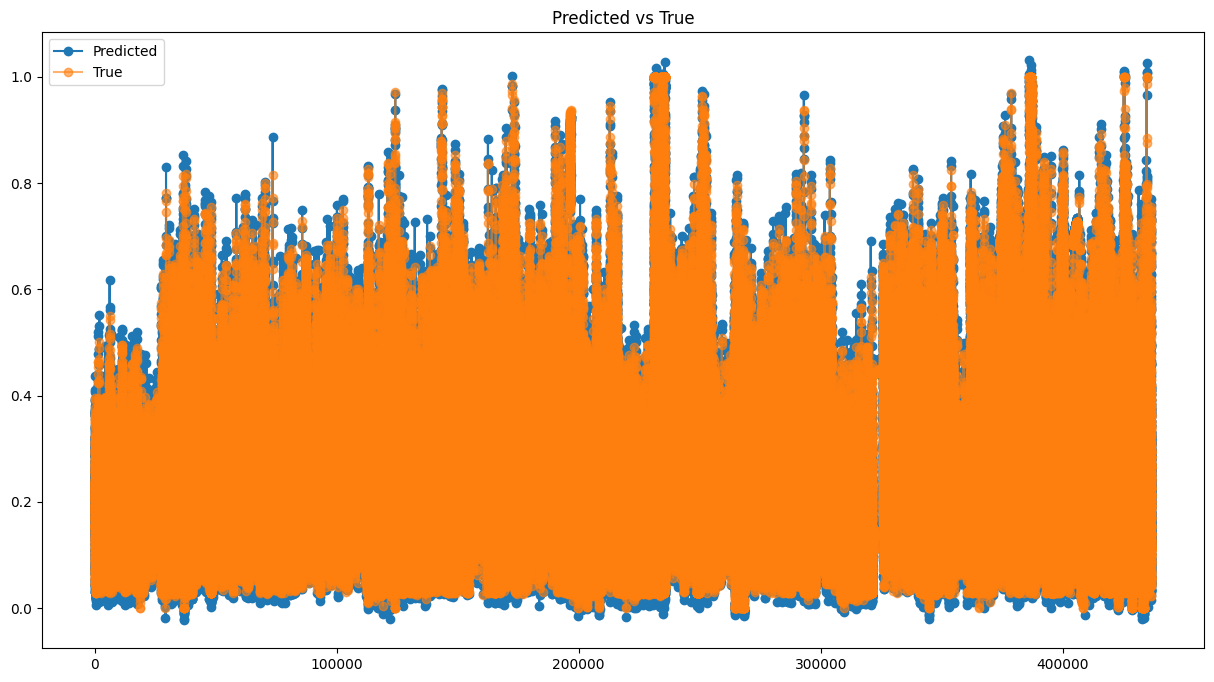

In [44]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [45]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.02826816876982955,
 'mse': 0.038990374730512846,
 'rmse': 0.0015202493216258145}